# Dataanalyse
Formålet med dataanlyse eller en såkalt statistisk analyse er å forstå datakvalitet og identifisere trender, og avdekke mønstre i datasettet som vil være til nytte for forståelse og innsikt i miljøforholdene over tid. De gir en rettesnor for fokus videre i visualisering av datene og den prediktive analysen. Deskriptiv statistikk er delt opp etter å finne middelverdi, spredning og "form" på datasettet.
Første steget er å beregne median, gjennomsnitt, typetall/module, standardavvik og varians. Median, gjenomsnitt og typetall er til for å sammenlignes og se om datasettet er skjevfordelt eller normalfordelt (symetrisk) og at median og gjennomsnitt bør være like. Standardavvik og varians vil si noe om spredning og hvor konsentrert datasettet er. Det må bli gjort opp en mening om man skal finne for hver dag, årstid eller år.
Neste steg er analyse av to eller flere variabler ved bruk av korrelasjoner som er basert på kvantitaiv argumentasjon for hvorfor de ikke bare kan værespuriøse sammenhenger.
Helt til slutt blir det fremstilt et histogram for å vise hyppigheten i de ulike kategoriene og alvorlighetsgraden av værdataene.

In [1]:
# Henter inn biblioteker og datasett
import pandas as pd
import os
import sys 
sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), '../src')))
original_file = "blindern_data_cleaning.csv"
data_path = os.path.join(os.getcwd(),"..", "data")
original_path = os.path.join(data_path, original_file)  
df = pd.read_csv(original_path, delimiter=";")
from modelling.data_analysis import DataAnalysis
import json
bins_path = os.path.join(os.getcwd(), "..", "data", "bins.json")
with open(bins_path, "r", encoding="utf-8") as f:
    bin_defs = json.load(f)

da = DataAnalysis(df, 'Middeltemp', ['Snø', 'Nedbør', 'Høye vindkast'], {"Middelvind": 20.8,"Nedbør": 20.0}, bin_defs)



In [2]:
da.statistical_values()

The average for each column is:
Makstemp         11.602115
Mintemp           4.153036
Middeltemp        7.617745
Snø               3.974116
Nedbør            2.423843
Middelvind        2.703982
Høye vindkast     5.564012
dtype: float64
The median for each column is:
Makstemp         11.4
Mintemp           3.6
Middeltemp        7.1
Snø               0.0
Nedbør            0.1
Middelvind        2.5
Høye vindkast     5.2
dtype: float64
The standard deviation for each column is:
Makstemp         9.050974
Mintemp          7.244604
Middeltemp       7.855064
Snø              9.927656
Nedbør           5.256624
Middelvind       1.134572
Høye vindkast    2.226089
dtype: float64
The average for each season is:
         Makstemp    Mintemp  Middeltemp        Snø    Nedbør  Middelvind  \
season                                                                      
Autumn  10.910390   4.863237    7.623676   0.124875  2.937463    2.691908   
Spring  11.807905   2.643577    6.929842   4.465415  1.684881

I takt med klimaendringer vil det bli større sannsynlighet for varmere klima med kortere vinterdager (dager uten snø) og lenger tørkeperioder (dager uten nedbør). DEtte vil igjen ha påvirkning på beredskap og rasjonering av vann.

In [3]:
da.drydays()
da.snowdays()

Antall dager uten nedbør etter en annen: [17, 12, 16, 15, 12, 14, 20, 12, 17, 13, 12, 13, 21, 15]
Typetall for antall dager uten nedbør sammenhengende: 12
Minste antall dager er 12
Antall dager med snø etter en annen: [38, 6, 19, 50, 22, 6, 26, 9, 41, 123, 112, 14, 8, 21, 30, 12, 118, 123, 114, 7, 5]
Typetall for antall dager med snø sammenhengende: 6
Minste antall dager er 5


Vi vil se at snømengden vil avhenge av temperaturen og gå ned når temperaturen går opp. Korrelasjon viser styrken på sammenheng, dvs. hvor godt to ting "følger hverandre" med en gitt verdi mellom -1 og 1. 
- 1 = perfekt samsvar
- 0 = ingen sammenheng, 
- -1 = motsatt sammenheng.

               Makstemp       Snø    Nedbør  Høye vindkast
Makstemp       1.000000 -0.453526  0.045628       0.054190
Snø           -0.453526  1.000000 -0.005860      -0.047109
Nedbør         0.045628 -0.005860  1.000000       0.145540
Høye vindkast  0.054190 -0.047109  0.145540       1.000000
                Makstemp        Snø     Nedbør  Høye vindkast
Makstemp       81.920127 -40.751591   2.170866       1.091831
Snø           -40.751591  98.558349  -0.305805      -1.041106
Nedbør          2.170866  -0.305805  27.632093       1.703069
Høye vindkast   1.091831  -1.041106   1.703069       4.955473


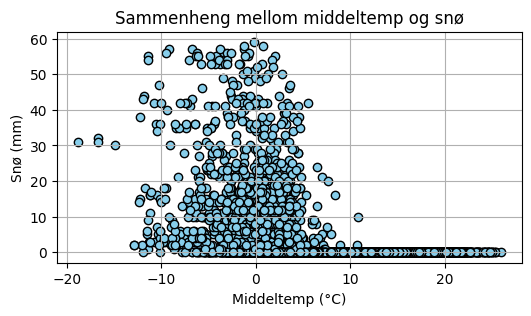

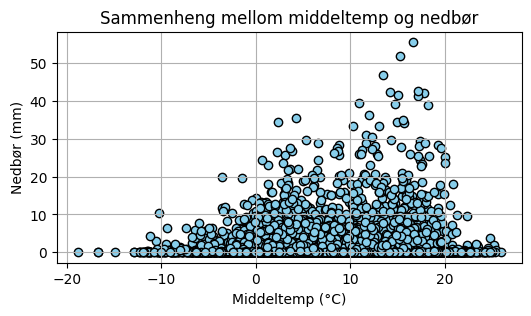

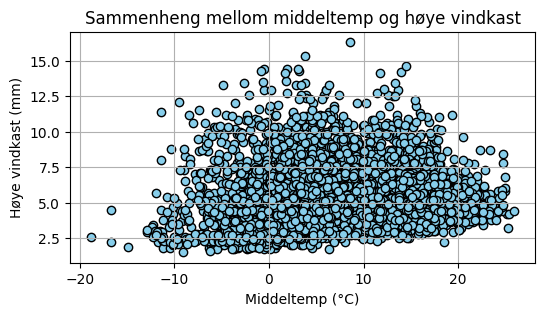

In [4]:
print(df[['Makstemp','Snø','Nedbør', 'Høye vindkast']].corr())
print(df[['Makstemp','Snø','Nedbør', 'Høye vindkast']].cov())
da.scatterplot()

For den siste delen vil det være mulig å se nyansenene som hvor vanlig det er med høye/lave verdier for målingene. Med tanke på at snø er avhengig av årstid og fungerer kortere enn et halvt år (derav manglende data) så plukkes det kun de verdiene fra første dag med snø innen vintersesongen startet til siste dag med snø innen vintersesongens slutt.
Grenser er hentet 14.april 2025 fra https://www.met.no/vaer-og-klima/begreper-i-vaervarsling 
**Merk!** Nedbør har for siste 24 timene, men kun 1 time for styrtregn. Vind er i m/s
### Kategorier for Nedbør
| Kategori                  | Nedre grense (mm) | Øvre grense (mm) |
|---------------------------|-------------------|------------------|
| Oppholdsvær              | 0.0               | 0.0              |
| Stort sett oppholdsvær   | 0.0001            | 0.4              |
| Lette/enkelte byger      | 0.5               | 2.0              |
| Regn, sludd, snø, byger  | 2.1               | 20.0             |
| Tildels store mengder    | 20.1              | 100.0            |
| Styrtregn                | 100.1             | 200.0            |
---
### Kategorier for Middelvind
| Kategori         | Nedre grense (m/s) | Øvre grense (m/s) |
|------------------|--------------------|-------------------|
| Stille           | 0.0                | 0.2               |
| Flau vind        | 0.3                | 1.5               |
| Svak vind        | 1.6                | 3.3               |
| Lett bris        | 3.4                | 5.4               |
| Laber bris       | 5.5                | 7.9               |
| Frisk bris       | 8.0                | 10.7              |
| Liten kuling     | 10.8               | 13.8              |
| Stiv kuling      | 13.9               | 17.1              |
| Sterk kuling     | 17.2               | 20.7              |
| Liten storm      | 20.8               | 24.4              |
| Full storm       | 24.5               | 28.4              |
| Sterk storm      | 28.5               | 32.6              |
| Orkan            | 32.7               | 200.0             |


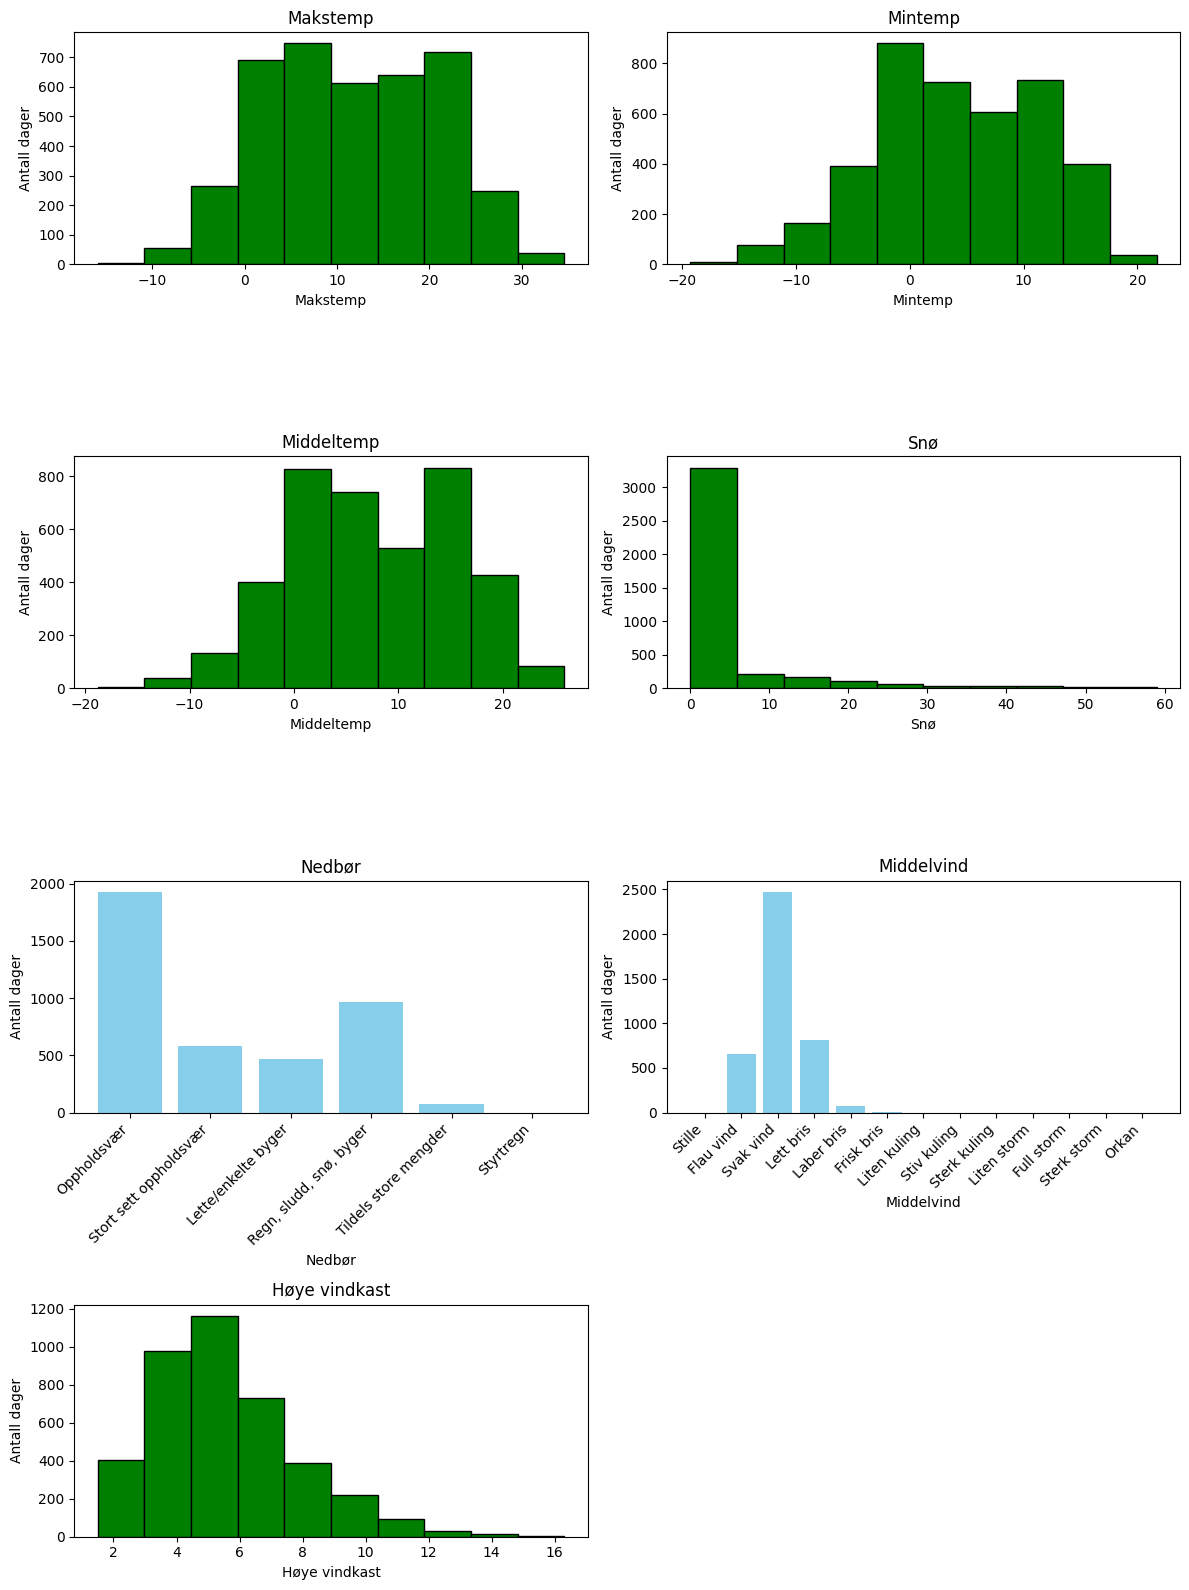

In [5]:
da.df_hist(df)

Som et tillegg kommer det plott av værdatene for å visuelt se om det er neoen sammenheng eller økning fra år til år. Pluss at det tas hensyn til at det er kortidsvarsler det er snakk om og ikke de siste 3-, 7- eller 30 dagene, som i utgangspunktet vil være gunstig med tanke på varsling av store nedbørsmengder.

In [6]:
da.years_max()


,Tid,Makstemp,Mintemp,Middeltemp,Snø,Nedbør,Middelvind,Høye vindkast
Tid,,,,,,,,
2014,2014,33.4,19.9,25.4,31.0,33.3,7.5,14.1
2015,2015,27.0,16.8,20.9,28.0,55.6,6.5,12.7
2016,2016,29.1,17.1,22.6,20.0,27.0,6.9,13.4
2017,2017,27.3,15.7,20.4,23.0,42.2,8.0,14.4
2018,2018,34.6,21.7,25.9,59.0,41.5,8.1,14.4
2019,2019,31.7,21.5,25.3,49.0,39.6,7.1,11.8
2020,2020,30.9,19.5,24.6,15.0,47.0,8.4,16.3
2021,2021,30.2,20.1,23.6,24.0,39.0,7.7,14.6
2022,2022,28.5,18.4,22.6,24.0,28.8,6.9,14.4


In [10]:
resultat = da.years_severity()
print(resultat)
print('\nGrensene som ble brukt:')
for k, v in da.limits.items():
    print(f"- {k}: {v:.2f}")


      Middelvind  Nedbør  Makstemp  Mintemp  Middeltemp  Snø  Høye vindkast
Tid                                                                        
2014           0       5        28        0           9    1             79
2015           0       7         5        0           0    0             76
2016           0       4        12        0           2    0             86
2017           0       6         4        0           0    0             70
2018           0       5        56        1          19   84             66
2019           0       7        17        2           4   20             79
2020           0      14        26        0           5    0             82
2021           0       4        24        0           3    0             60
2022           0       6        16        0           1    0             58
2023           0       9        18        0           4    7             58
2024           0       6        15        0           1   55             58

Grensene so

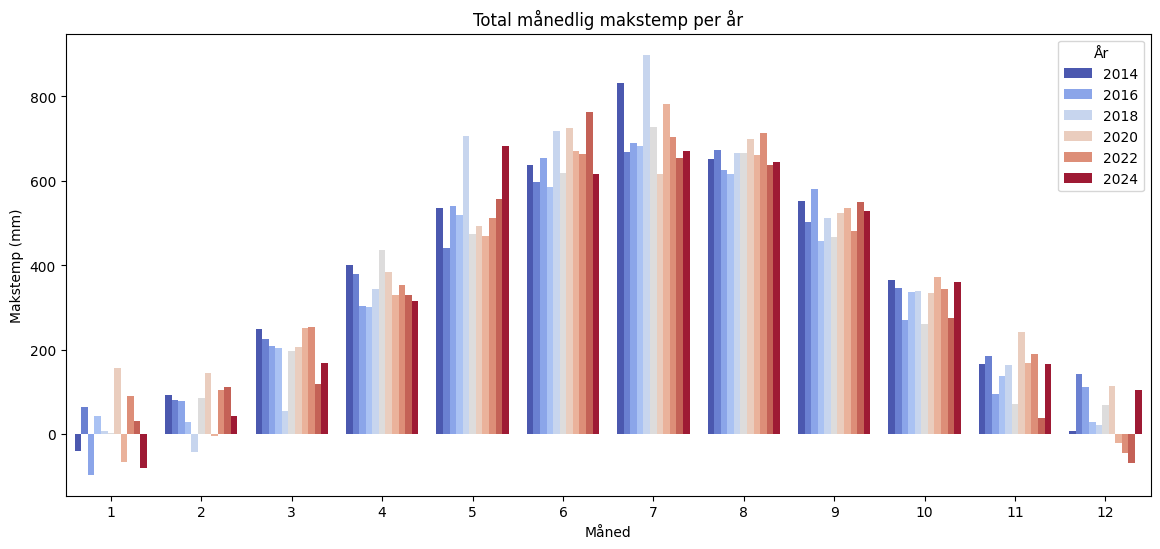

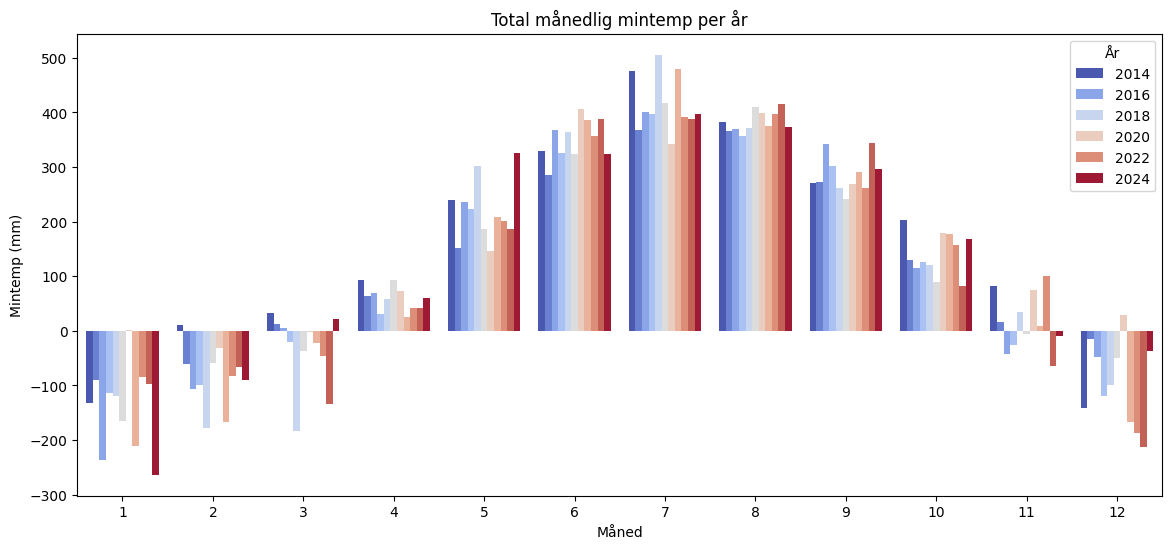

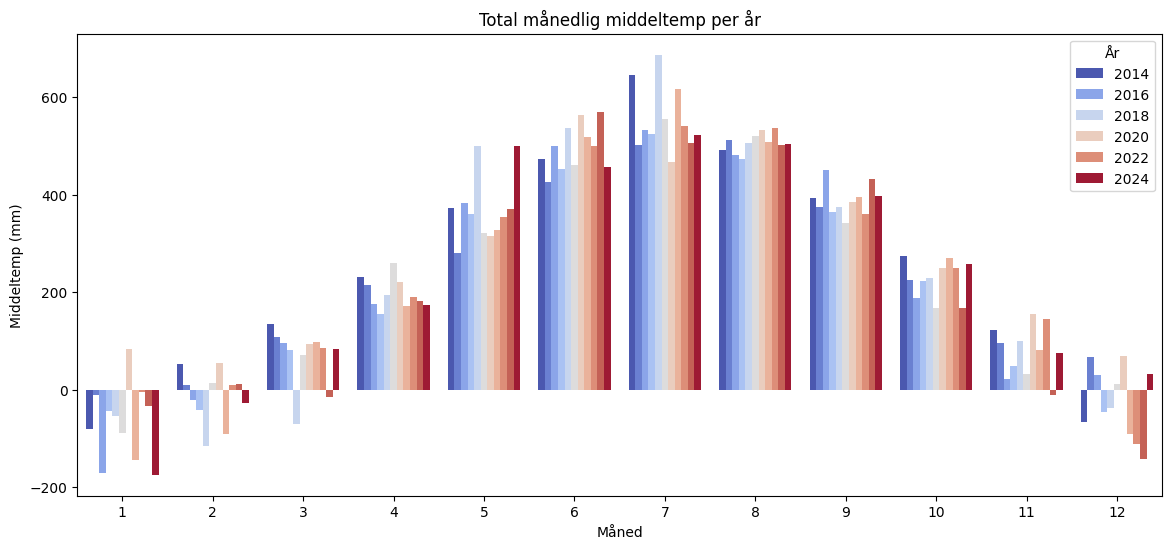

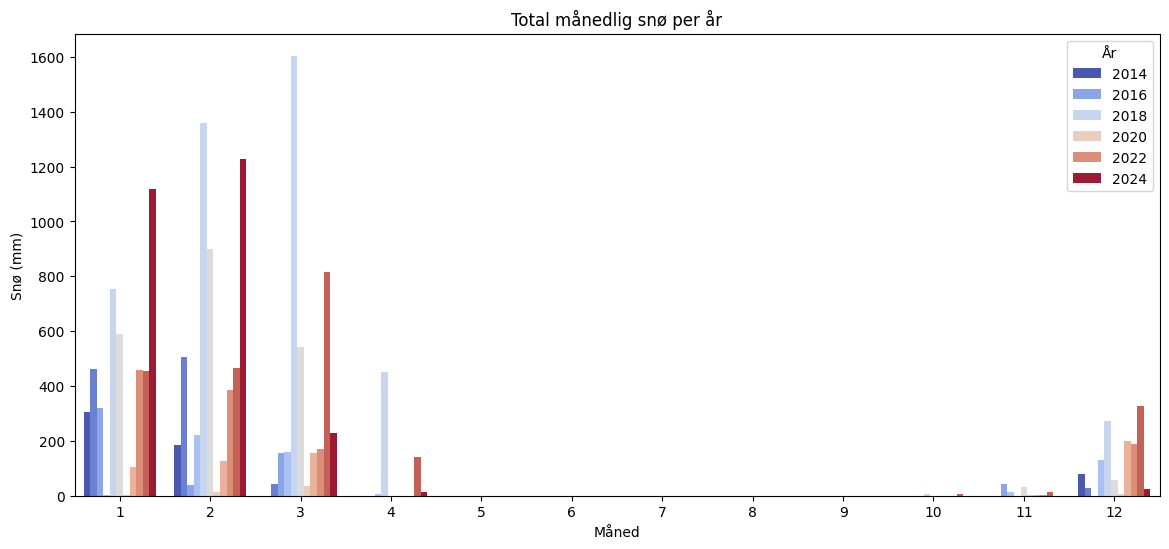

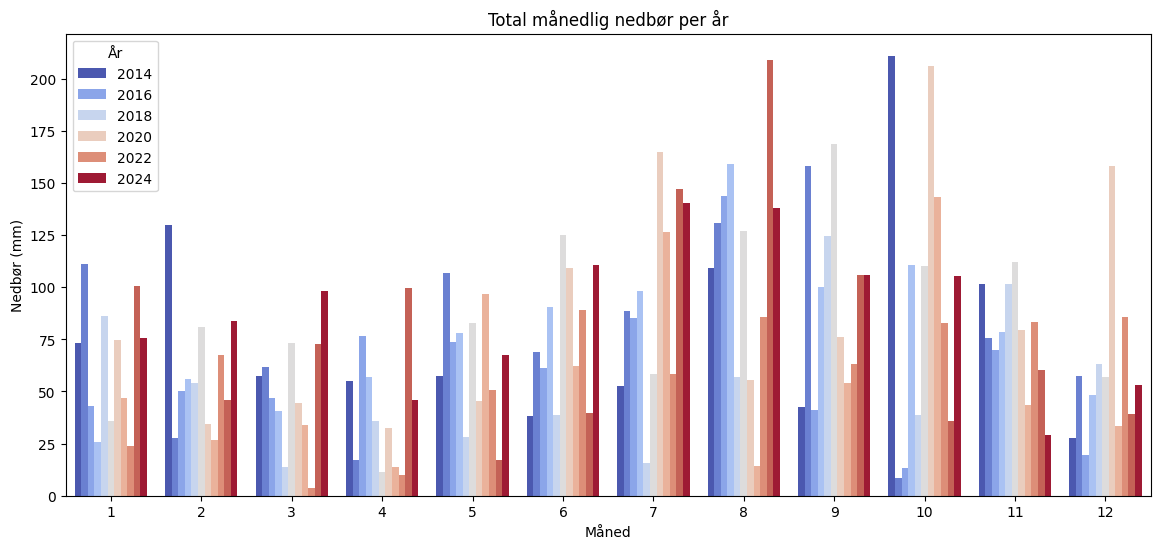

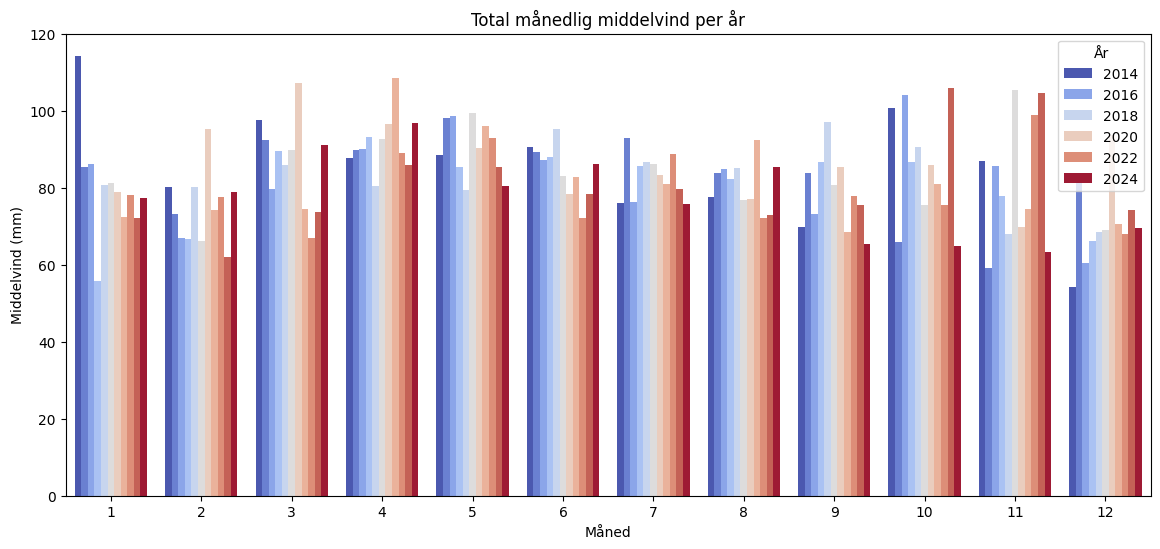

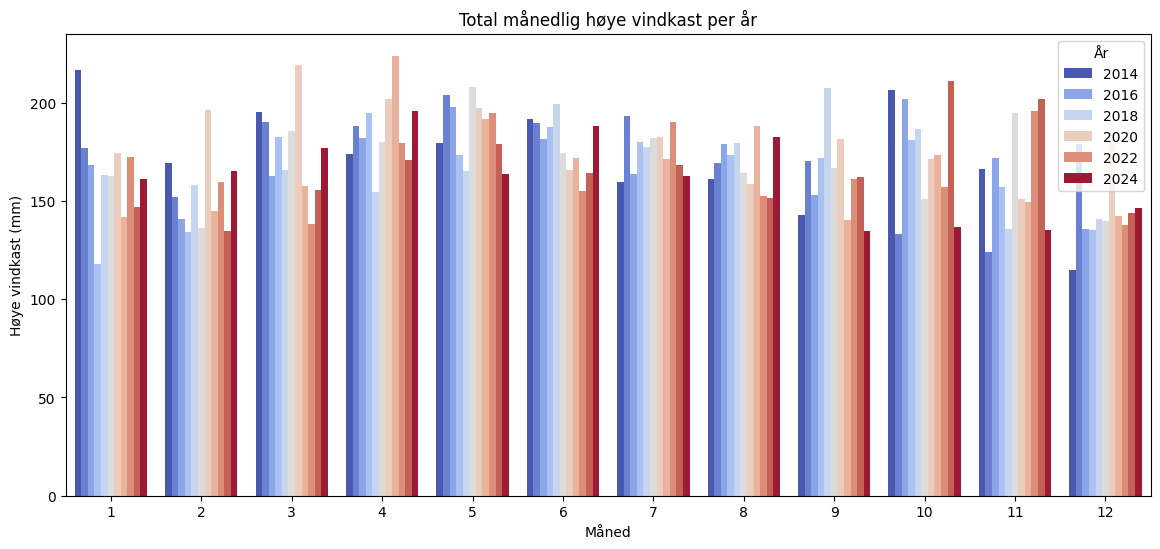

In [8]:
da.years_averageplot(df)